# Springboard Case Study: Southern Water Corp Statistical Analysis

Using descriptive and inferential statistics, the following analysis provides a model for better understanding and predicting pump failure at a water processing plant.

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

In [1]:
# Importing necessary libraries and setting chart sizing

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data required for this analysis includes two different files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data needed for my descriptive analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data needed for my inferential analysis.

In [2]:
# Importing data sources and storing as dataframes

dataframe_raw = pd.read_csv(r'C:\Users\Ideaspace 02\Desktop\Springboard\Unit 15 python\1614636602_Southern_Water_Corp_Case_Study\DF_Raw_Data.csv', index_col = 'TIMEFRAME (DD/MM/YYYY)')
dataframe_stdev = pd.read_csv(r'C:\Users\Ideaspace 02\Desktop\Springboard\Unit 15 python\1614636602_Southern_Water_Corp_Case_Study\DF_Rolling_Stdev.csv')


# Setting the TIMEFRAME (DD/MM/YYYY) column as the index

dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)', inplace=True)


# Taking a preliminary look at the data

print(dataframe_raw.describe())
print(dataframe_stdev.describe())
print(dataframe_raw.info())
print(dataframe_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

<h3> Observations </h3>

At first glance, it's apparent that the mean and standard deviation from dataframe_raw are noticably higher than the mean and standard deviation from dataframe_stdev. For example, the mean and stdev for Pump Torque are 202.8 and 22.7 in the raw dataset, but these drop to 13.9 and 12.4 in the stdev dataset. While Pump Torque represents the most extreme difference in mean and stdev between the two datasets, these measures are consistently higher in our raw data when looking at every variable.

This indicates that there could be signficant outliers in the raw dataset, resulting in a skewed mean and a larger spread of data, or variance.

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Exploratory Plots</span> 

Plotting each dataframe allows us to more easily explore these differences between the two data sources, including the upper and lower quartiles for each variable.

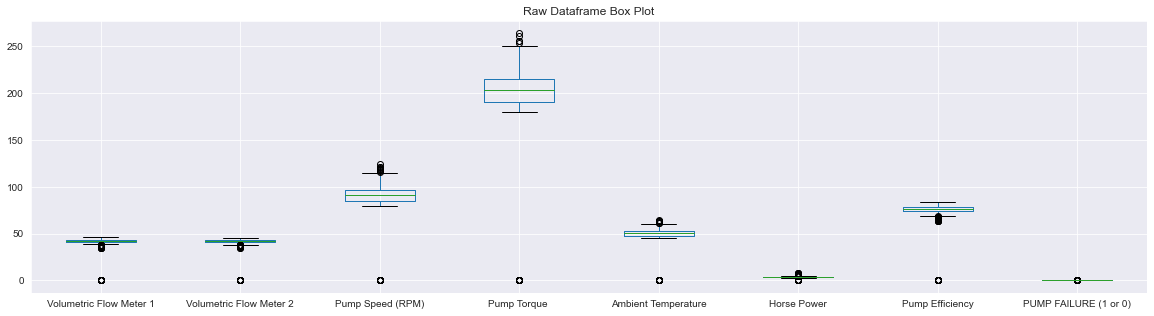

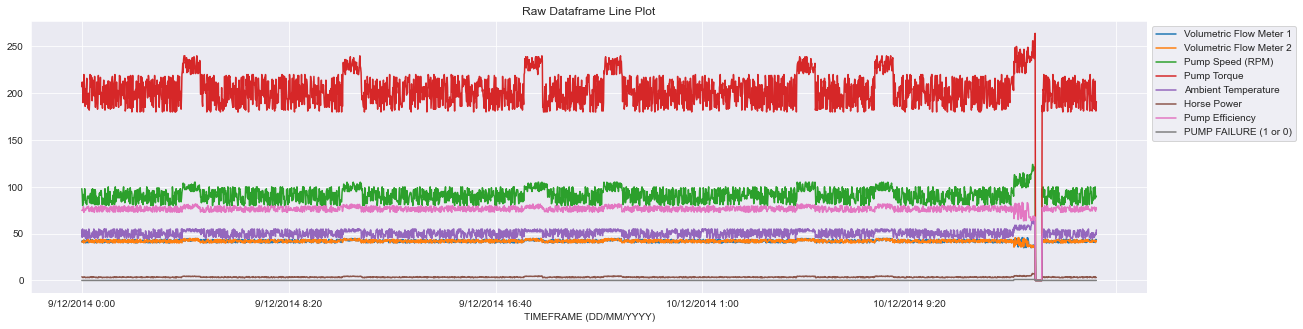

In [3]:
dataframe_raw.plot(kind='box')
plt.title('Raw Dataframe Box Plot')
plt.show()

dataframe_raw.plot()
plt.title('Raw Dataframe Line Plot')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

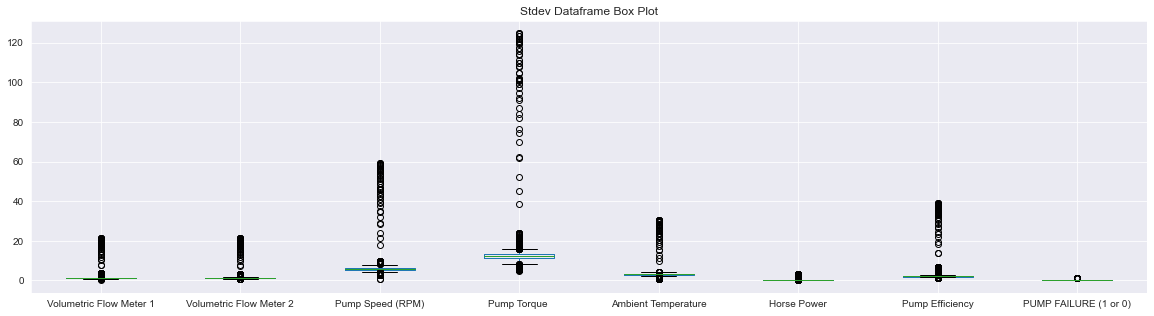

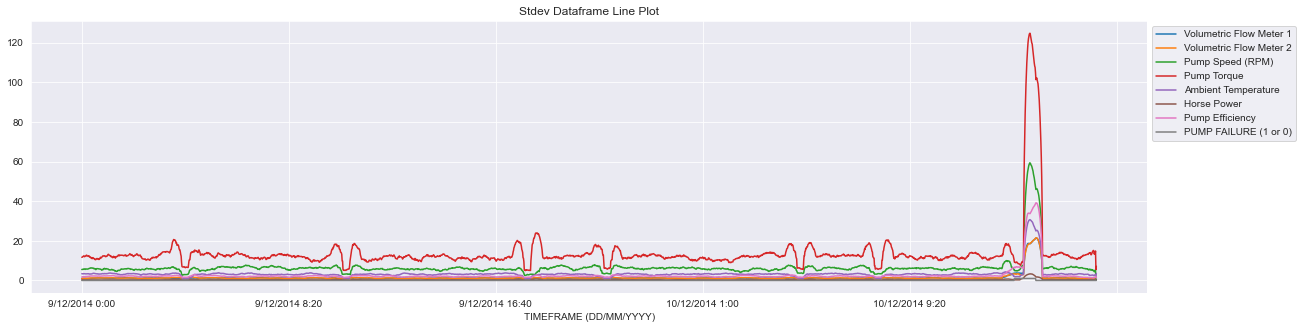

In [4]:
dataframe_stdev.plot(kind='box')
plt.title('Stdev Dataframe Box Plot')
plt.show()

dataframe_stdev.plot()
plt.title('Stdev Dataframe Line Plot')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

<h3> Observations </h3>

Viewing the data as box plots, we can see that there are visible differences in variance when comparing dataframe_raw and dataframe_stdev, wherin the interquartile ranges are much wider in dataframe_raw and the 25th percentile much higher. With the exception of Horse Power and Pump Failure, which appear the least affected variables between dataframes, all other variables have an IQR below 20 in dataframe_stdev. In comparison, the lowest IQRs in dataframe_raw are around 40. 

When we take a look at the line plots, there are noticable changes in variables in both dataframes during a Pump Failure (1), though it's difficult to determine individual changes with so many variables plotted. One observation that is clear from the stdev line plot is that Pump Torque experiences a signficant spike during a pump failure, jumping all the way from ~20 to over 120.

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Analyzing Pump Failure vs. Normal Functionality</span> 

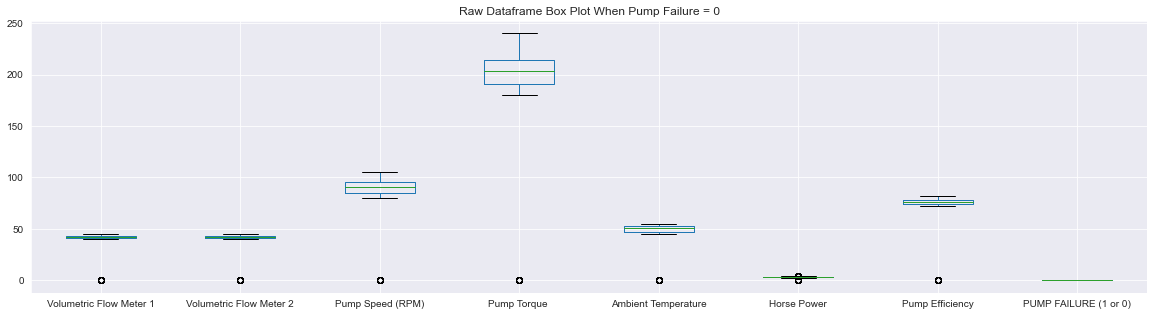

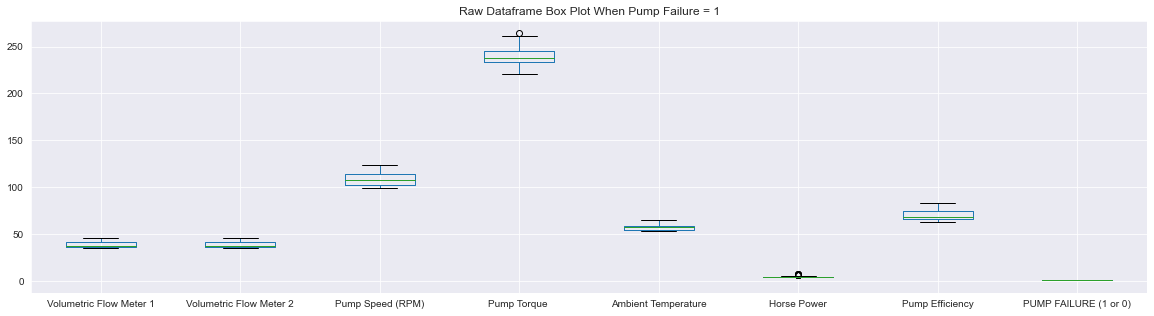

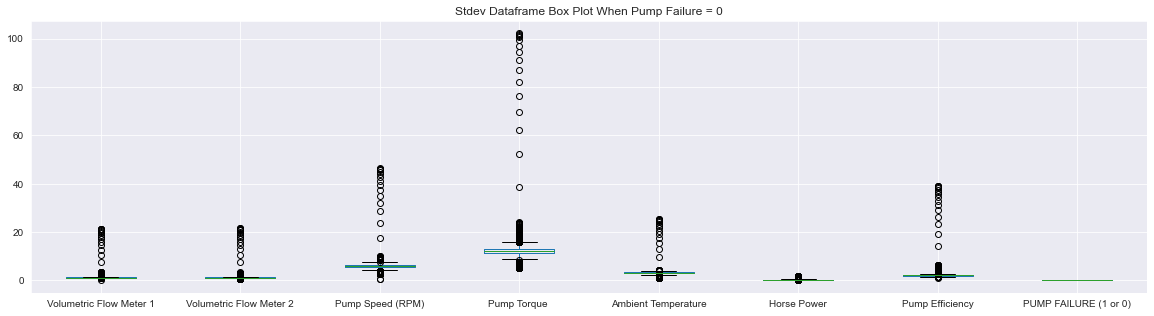

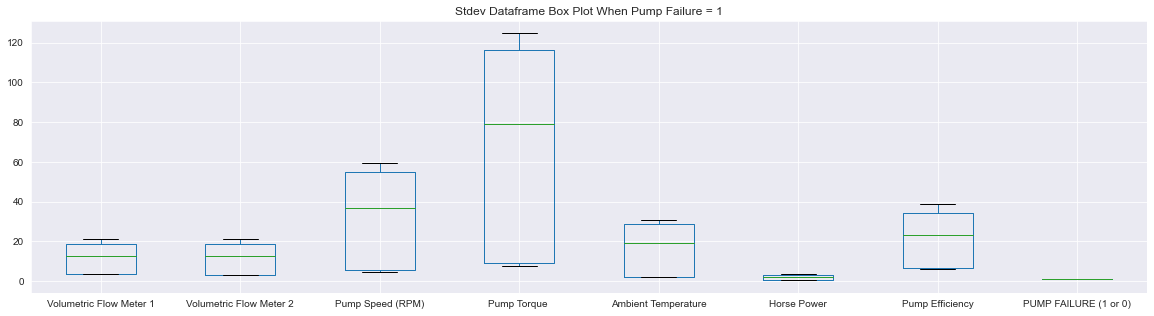

In [5]:
# Creating data subsets using boolean filters to explore pre-pump failure and post-pump failure trends

pump_raw_0 = dataframe_raw['PUMP FAILURE (1 or 0)']== 0
df_raw_0 = dataframe_raw[pump_raw_0]
df_raw_0.plot(kind='box')
plt.title('Raw Dataframe Box Plot When Pump Failure = 0')
plt.show()

pump_raw_1 = dataframe_raw['PUMP FAILURE (1 or 0)']== 1
df_raw_1 = dataframe_raw[pump_raw_1]
df_raw_1.plot(kind='box')
plt.title('Raw Dataframe Box Plot When Pump Failure = 1')
plt.show()

pump_stdev_0 = dataframe_stdev['PUMP FAILURE (1 or 0)']== 0
df_stdev_0 = dataframe_stdev[pump_stdev_0]
df_stdev_0.plot(kind='box')
plt.title('Stdev Dataframe Box Plot When Pump Failure = 0')
plt.show()

pump_stdev_1 = dataframe_stdev['PUMP FAILURE (1 or 0)']== 1
df_stdev_1 = dataframe_stdev[pump_stdev_1]
df_stdev_1.plot(kind='box')
plt.title('Stdev Dataframe Box Plot When Pump Failure = 1')
plt.show()

<h3> Observations </h3>

There are slight IQR differences when comparing pump failure and normal pump behavior in the raw dataframe. However, these differences are much more significant in the stdev dataframe, where the box plots during a pump failure show extreme increases in the mean.The most notable increase occurs with Pump Torque, whose mean jumps from under 20 when a pump is functioning normally, to ~80 when a pump fails. Other notable increases include Pump Speed, Ambient Temperature, and Pump Efficiency, which indicates that these four variables are most affected by pump failure.

It's also worth noting that there are a lot of outliers in the stdev dataframe, which should be examined more closely.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Managing Outliers</span> 

An outlier is considered to be any value that is either Q1 - 1.5x the interquartile range, or Q3 + 1.5x the interquartile range. In order to calculate these values we need to follow a few steps:

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the DataFrame for outliers and remove them.
5. Calculate what the proportion of outliers exist (i.e. Number of entries left after outlier removal / Number of total entries in dataset). 

In [6]:
# Creating quartile variables where Q1 = Quartile 1 and Q3 = Quartile 3

Q1 = dataframe_raw.quantile(0.25, axis=0)
Q3 = dataframe_raw.quantile(0.75, axis=0)


# Calculating the interquartile range for all columns

IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [7]:
# Creating outlier variables

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


# Defining outliers and non-outliers

outliers = dataframe_raw[((dataframe_raw < lower_limit) | ((dataframe_raw > upper_limit))).any(axis=1)]
non_outliers = len(dataframe_raw)-len(outliers)


# Understanding the breakdown of outlier values vs. non-outlier values

print('Total data: ', len(dataframe_raw))
print('Total outliers: ', len(outliers))
print('Total non-outliers: ', non_outliers)
print('% of outliers: ', len(outliers)/len(dataframe_raw)*100)
print('% of non-outliers: ', non_outliers/len(dataframe_raw)*100)

Total data:  2453
Total outliers:  95
Total non-outliers:  2358
% of outliers:  3.872808805544232
% of non-outliers:  96.12719119445576


<H3> Observations </H3> 


In many cases, removing outliers can prevent skewed data and is a good approach to take. For this analysis, 96% of my data would still be intact. However, previous plots showed huge spikes and drops in data during a pump failure, and this is exactly what I want to observe. For this reason I'm inclined not to remove any outliers, but some plotting will give me a complete picture of what it will look like if I do.

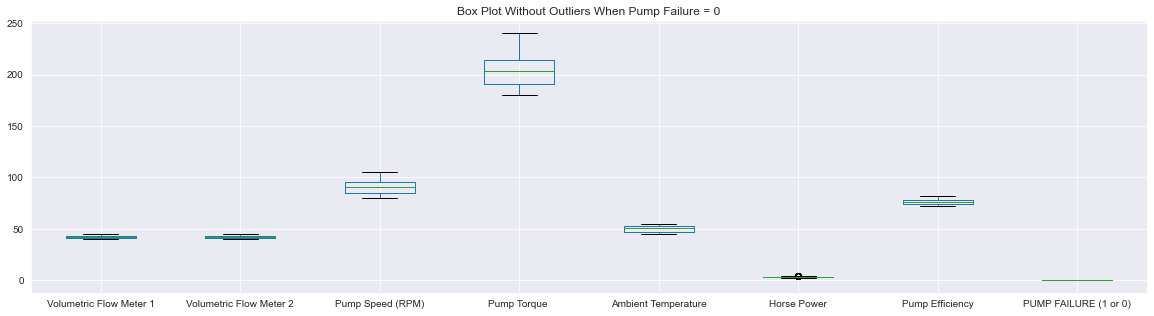

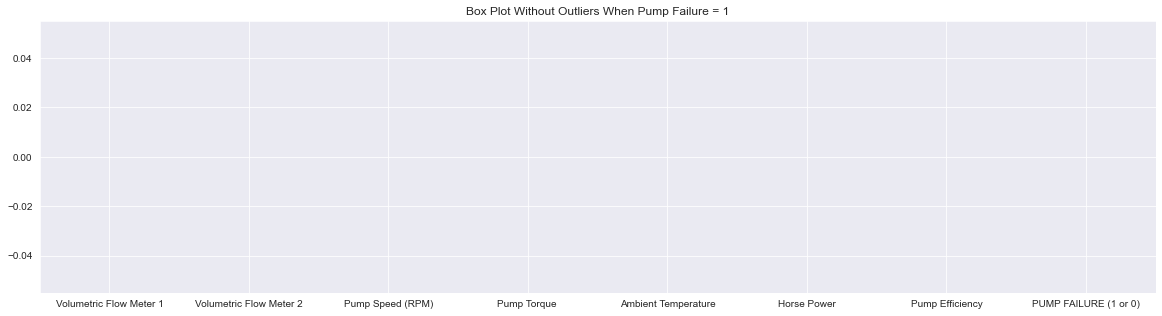

In [8]:
# Plotting the data without any outliers

no_outliers = dataframe_raw[~ ((dataframe_raw < lower_limit) | (dataframe_raw > upper_limit)).any(axis=1)]

pump_no_0 = no_outliers['PUMP FAILURE (1 or 0)']== 0
no_outliers[pump_no_0].plot(kind='box')
plt.title('Box Plot Without Outliers When Pump Failure = 0')
plt.show()

pump_no_1 = no_outliers['PUMP FAILURE (1 or 0)']== 1
df_no_1 = no_outliers[pump_no_1]
df_no_1.plot(kind='box')
plt.title('Box Plot Without Outliers When Pump Failure = 1')
plt.show()

Sure enough, there is no data to plot during a pump failure when outliers are removed. I need them for my analysis.

### Step 6: <span style="color:green">Plotting and Examining Each Column</span> 

In previous plots, it was easy to spot outliers but difficult to see which variables were the most significant with respect to pump failure because all variables were plotted together and scaled differently. To resolve this, we need to plot each variable distinctly in comparison to Pump Failure.

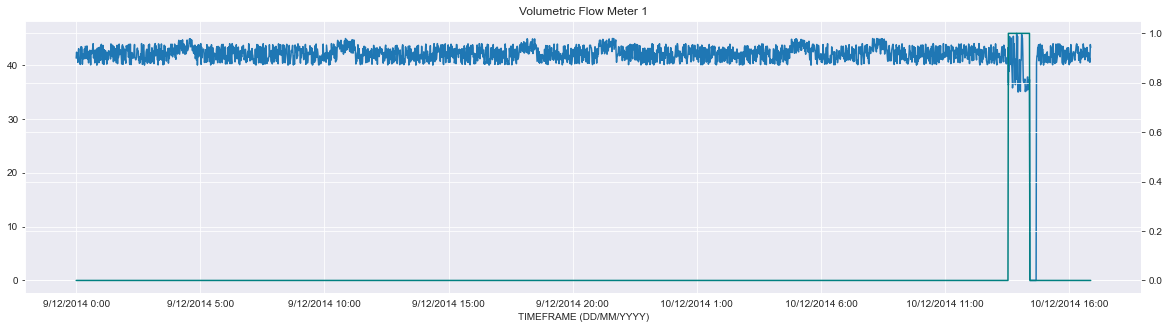

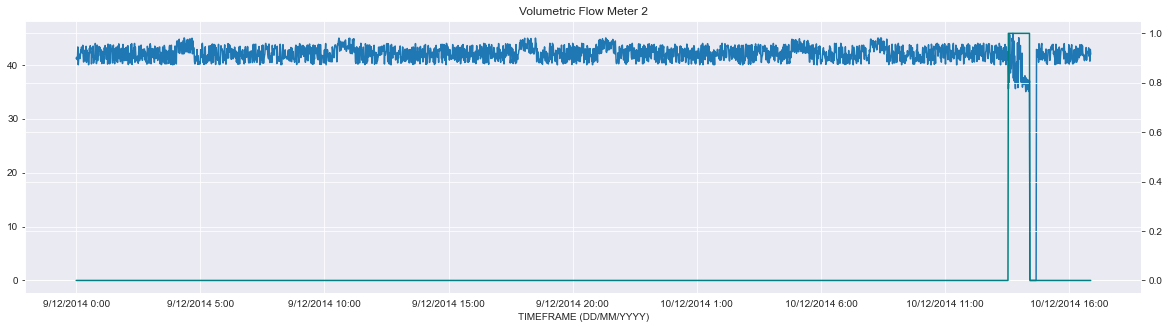

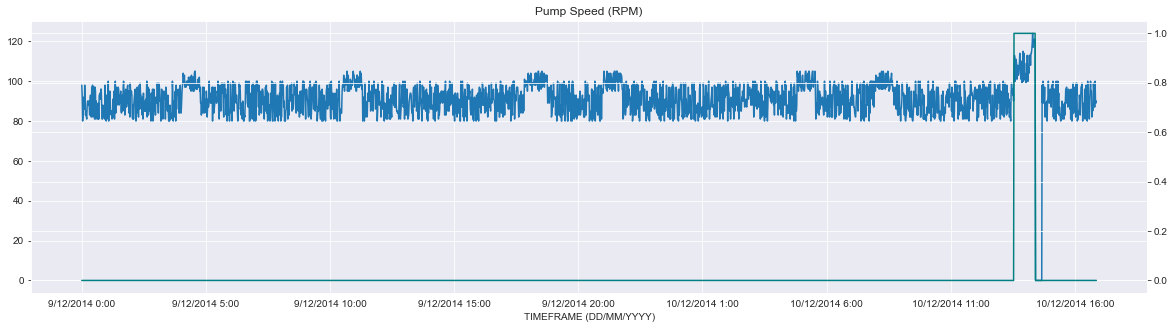

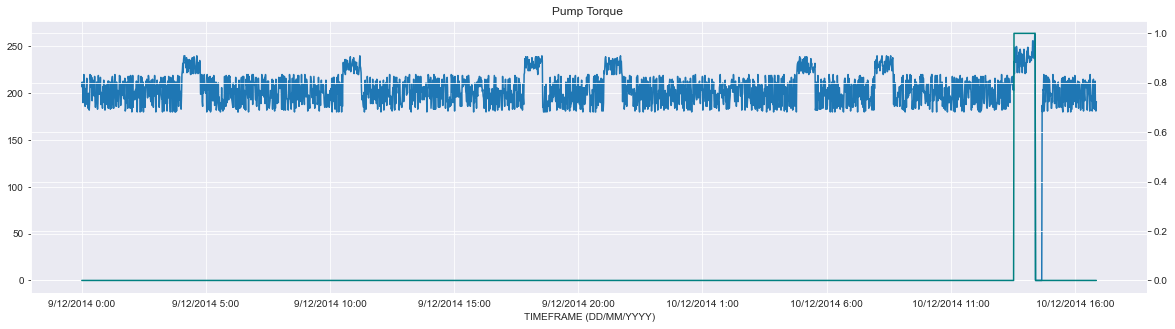

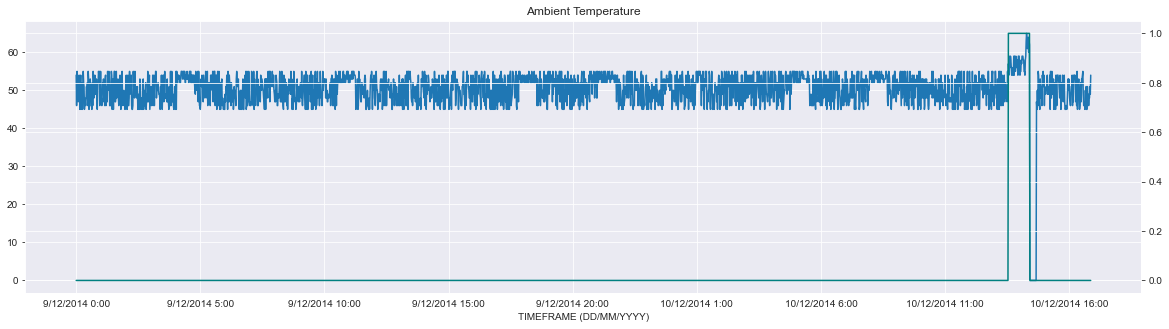

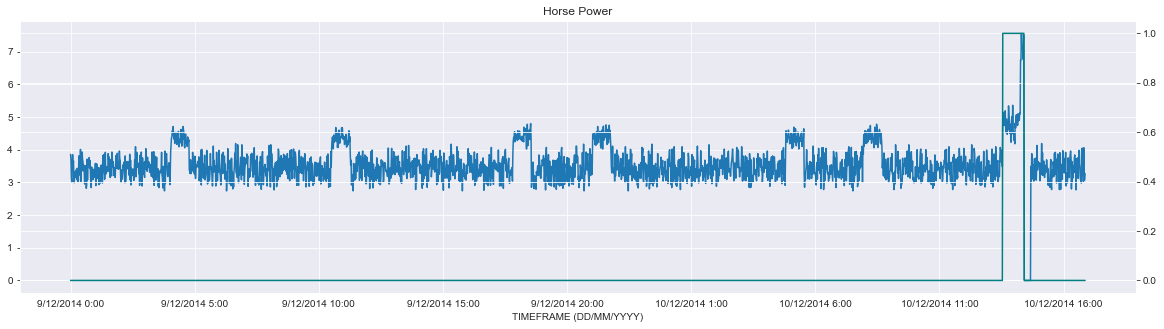

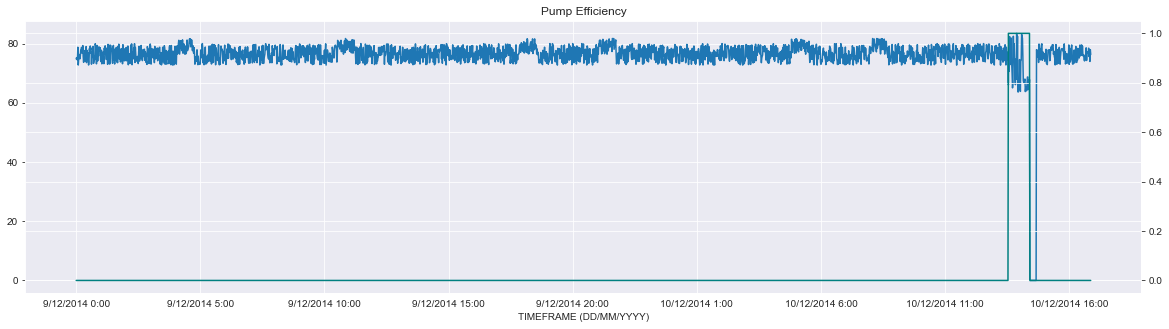

In [9]:
ListOfVariables = list(dataframe_raw.drop(columns=['Data Source', 'PUMP FAILURE (1 or 0)']))


# Plotting every quantitative variable individually, using a dual axis to view Pump Failure on the second y-axis

for i in ListOfVariables:
    first_axis = dataframe_raw[i].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis = first_axis.twinx()
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color='teal')
    plt.title(i)
    plt.show()

<h3> Observations </h3> 

Now that each variable is plotted separately, it's much easier to view the effects of Pump Failure. Volumetric Flow Meter 1 and 2, and Pump Efficiency all drop during a failure, while all other variables increase. Of these, it appears that Horse Power experiences a signficant spike, which was undetectable in previous plots. 

---

### Step 7: <span style="color:green">Creating a Plot for Pump Failures Over a Rolling Time Period</span> 

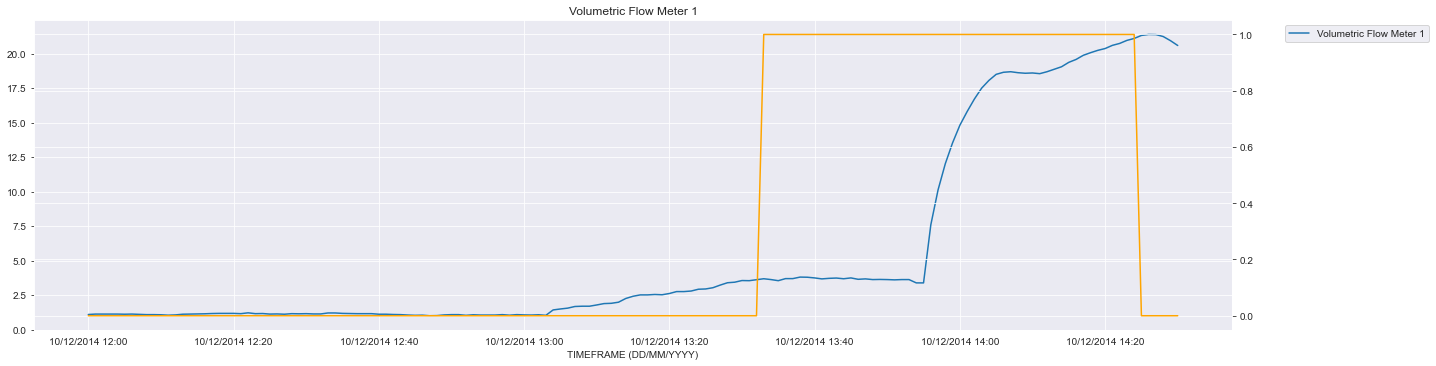

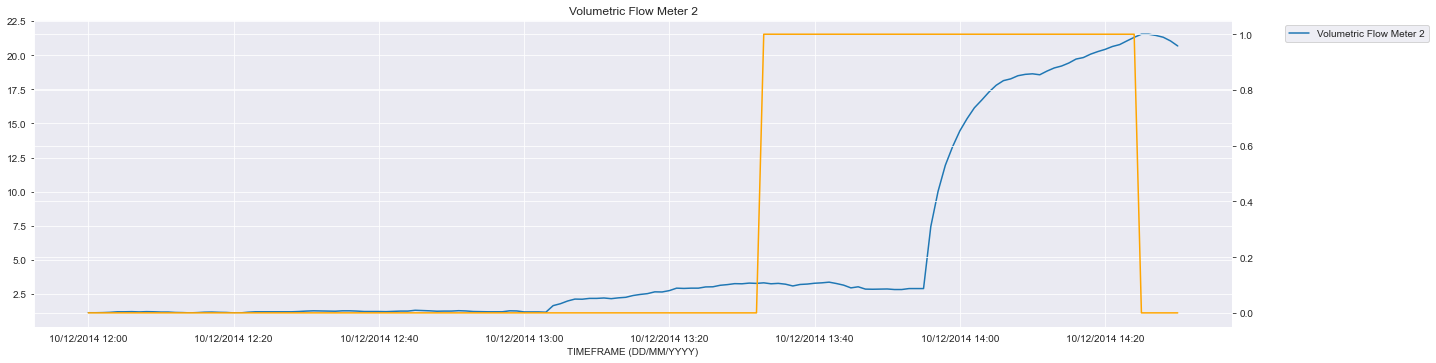

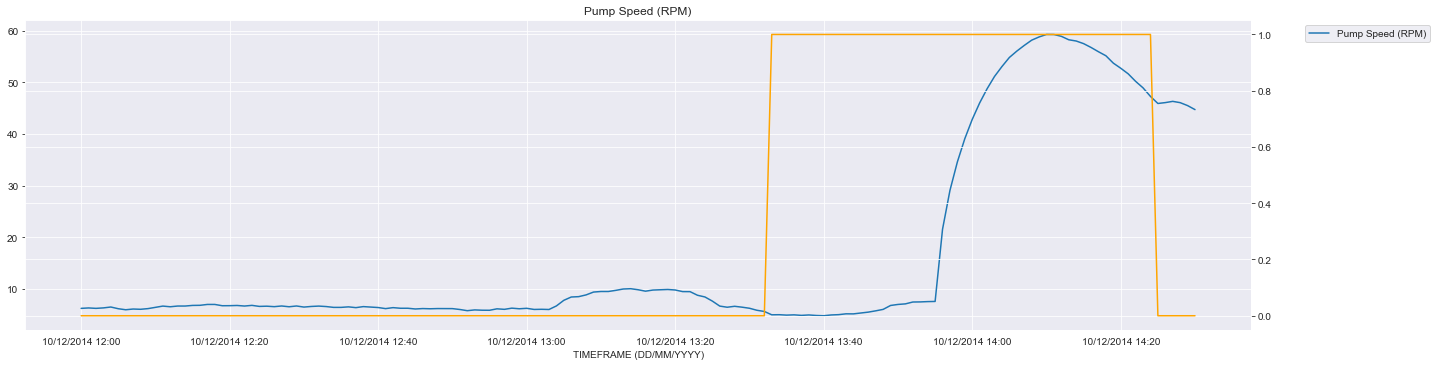

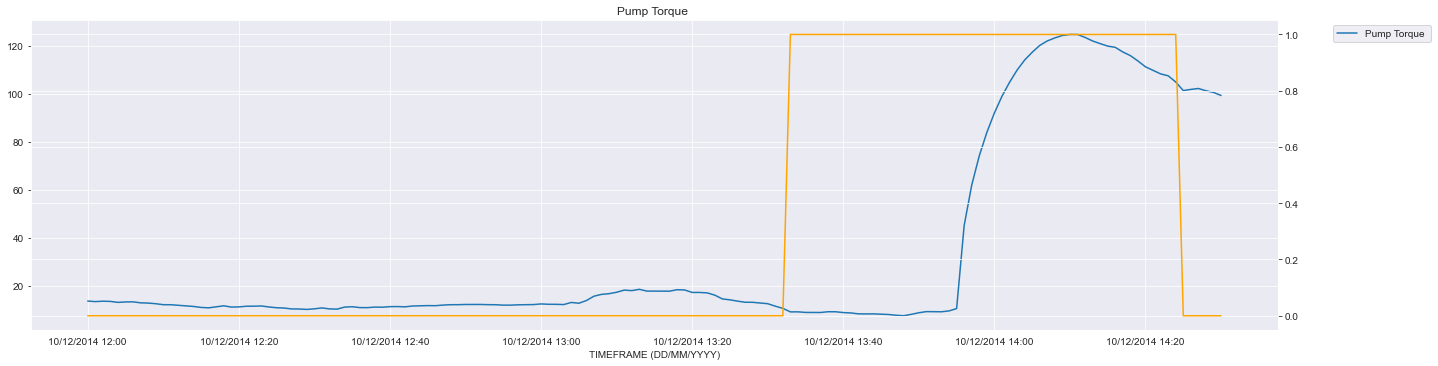

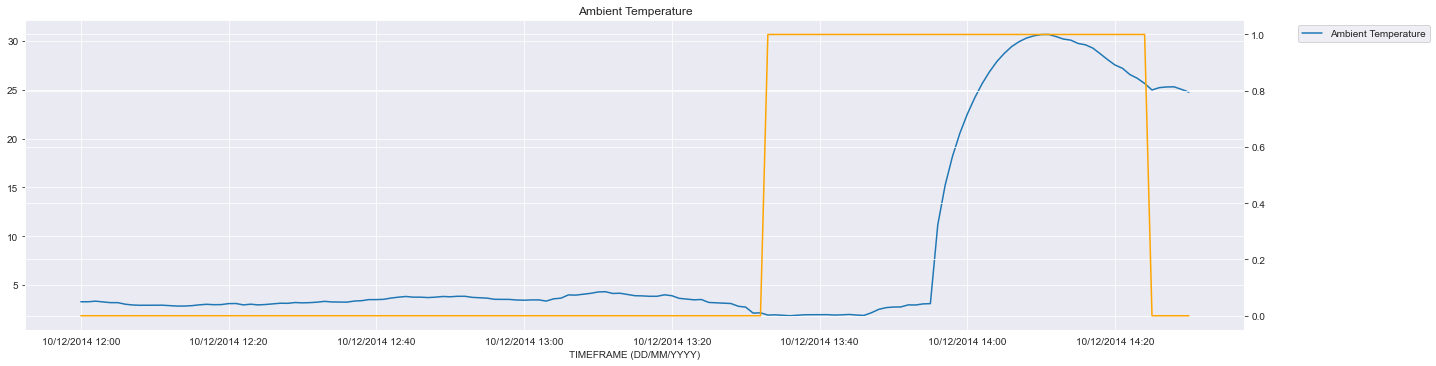

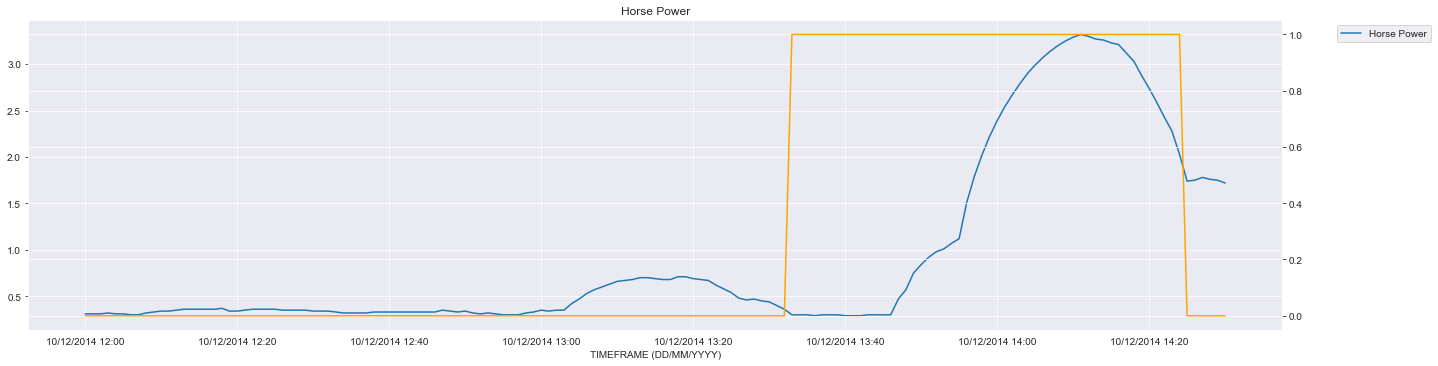

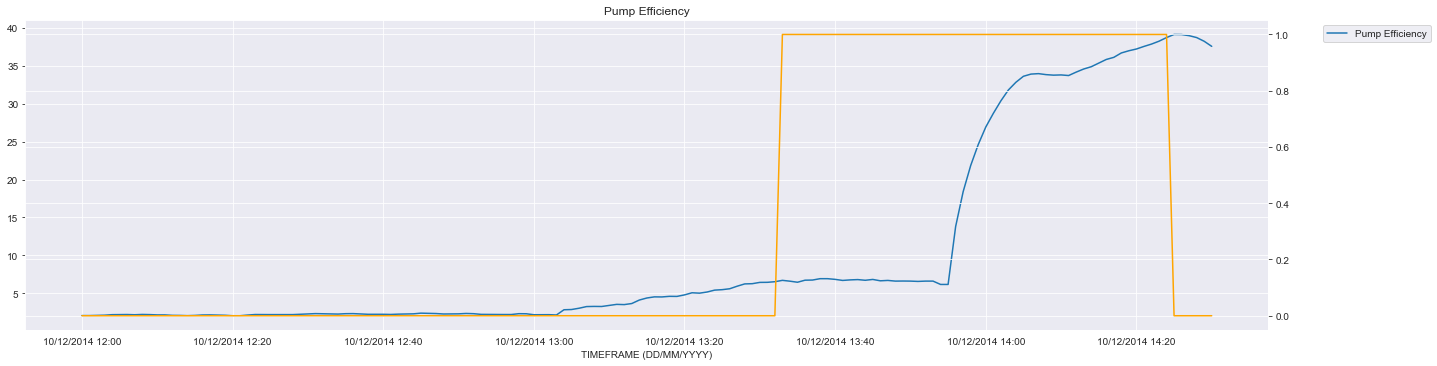

In [10]:
# Zooming in on a specific time period in the standard deviation data, where a pump failure occurred

dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 12:00")&((dataframe_stdev.index <= "10/12/2014 14:30"))]

listOfVariables = dataframe_time_filtered.drop(['PUMP FAILURE (1 or 0)','Data Source'], axis=1).columns


# Plotting each variable, with PUMP FAILURE on the secondary axis for comparison

for i in listOfVariables:
    first_axis = dataframe_time_filtered[i].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'], 'orange')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    first_axis.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout()
    plt.title(i)
    plt.show()

<h3> Observations </h3> 

Narrowing the plots in this way means that changes in our variables are much more clear. For example, it can now be observed that every variable starts to exhibit a steady increase starting approximately 30 minutes before pump failure, at 13:00. This is a key discovery for predicting when a pump will fail.

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

**Which variables seem to correlate with Pump Failure?**


### Step 8: <span style="color:green">Correlation Analysis</span> 

<AxesSubplot:>

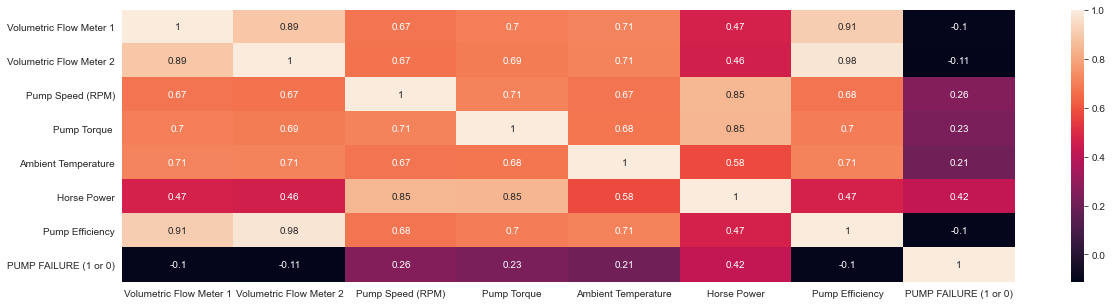

In [11]:
correlated_dataframe = dataframe_raw.corr()
sns.heatmap(correlated_dataframe, annot=True)

We don't see any particularly strong correlations here between pump failure and our variables, but Horse Power has the highest correlation at 42%.


### Step 9: <span style="color:green">Plotting Correlated Features</span>

In [12]:
correlated_dataframe

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


<AxesSubplot:>

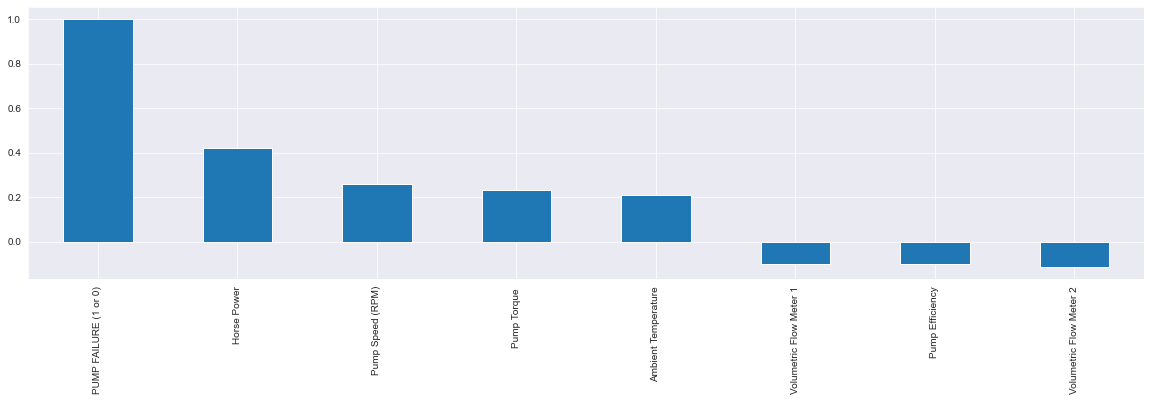

In [13]:
correlated_dataframe['PUMP FAILURE (1 or 0)'].sort_values(ascending=False).plot(kind='bar')

---

### Step 10: <span style="color:green">Creating a Rolling Standard Deviation Heatmap</span> 
Previously, we saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset instead of the dataframe_raw dataset.

<AxesSubplot:>

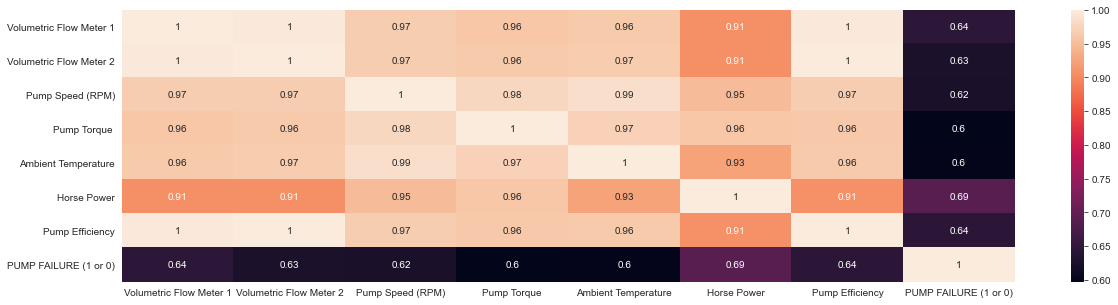

In [14]:
corr_stdev = dataframe_stdev.corr()
sns.heatmap(corr_stdev, annot=True)

<h3> Observations </h3>

Now we can observe stronger correlations between pump failure and our variables, where each variable lies within a range between 0.60 and 0.69. Like we saw in the raw data heatmap, Horse Power has the highest correlation, followed by Volumetric Flow Meter 1 and Pump Efficiency.

### Step 11: <span style="color:green">Multivariate Regression</span> 
Using the Ordinary Least Squares Regression Model in the statsmodel.api library, we can create a regression equation that models the Pump Failure (Y-Variable) against all our independent variables in both data sets.

In [15]:
# Establishing our dependent (PUMP FAILURE) and independent variables for dataframe_raw

dataframe_raw = pd.read_csv(r'C:\Users\Ideaspace 02\Desktop\Springboard\Unit 15 python\1614636602_Southern_Water_Corp_Case_Study\DF_Raw_Data.csv')

x = dataframe_raw[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

y = dataframe_raw['PUMP FAILURE (1 or 0)']


# Add a constant stream of 1's in a column to account for bias in the model

x = sm.add_constant(x)


# Store and fit model

raw_model = sm.OLS(y, x).fit()


# Print to view regression statistics

print(raw_model.summary())


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Mon, 17 May 2021   Prob (F-statistic):          5.58e-233
Time:                           15:02:15   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [16]:
# Following the same process as above for the dataframe_stdev data set

dataframe_stdev = pd.read_csv(r'C:\Users\Ideaspace 02\Desktop\Springboard\Unit 15 python\1614636602_Southern_Water_Corp_Case_Study\DF_Rolling_Stdev.csv')

x = dataframe_stdev[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

y = dataframe_stdev['PUMP FAILURE (1 or 0)']

x = sm.add_constant(x)
stdev_model = sm.OLS(y, x).fit()

print(stdev_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                           15:02:19   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

<h3> Observations </h3>



The R Squared tells us how good our model fits the data, with a higher R Squared indicating a good fit. Because the R Squared for the raw dataset model is only 36%, this is not a good fit. The stdev model is a much better fit, with an R Squared of 78%. We'll use this model moving forward.

### Step 12: <span style="color:green">Analysis of Coefficients </span>

Using the stdev model, we can now extract the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. In other words, which variables spike the most in relation to Pump Failure?

<AxesSubplot:>

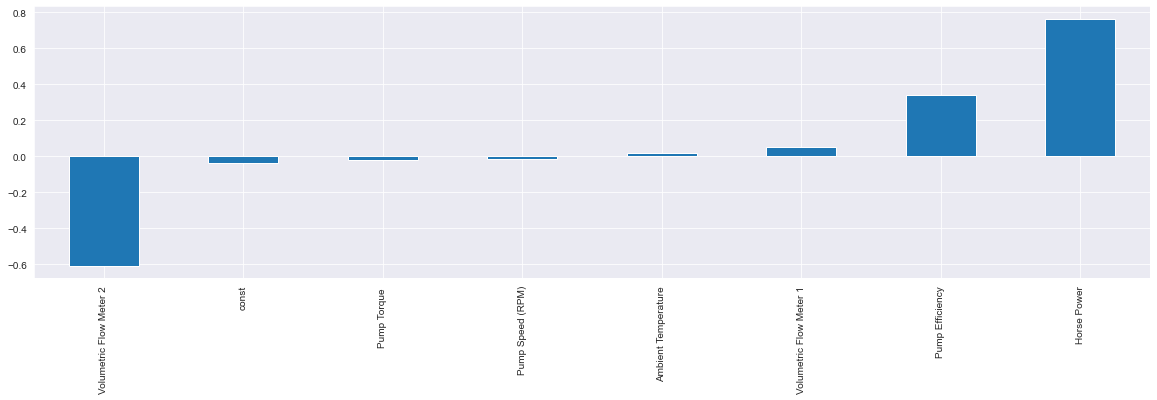

In [17]:
stdev_model.params.sort_values().plot(kind='bar')

<h3> Observations </h3>



The three variables that exhibit the strongest relationship with pump failure are Volumetric Flow Meter 2, which shows a significant drop during pump failure, and Pump Efficiency and Horse Power, which both show significant spikes in performance during pump failure.


### Step 13: <span style="color:green">Validating Our Predictions</span> 

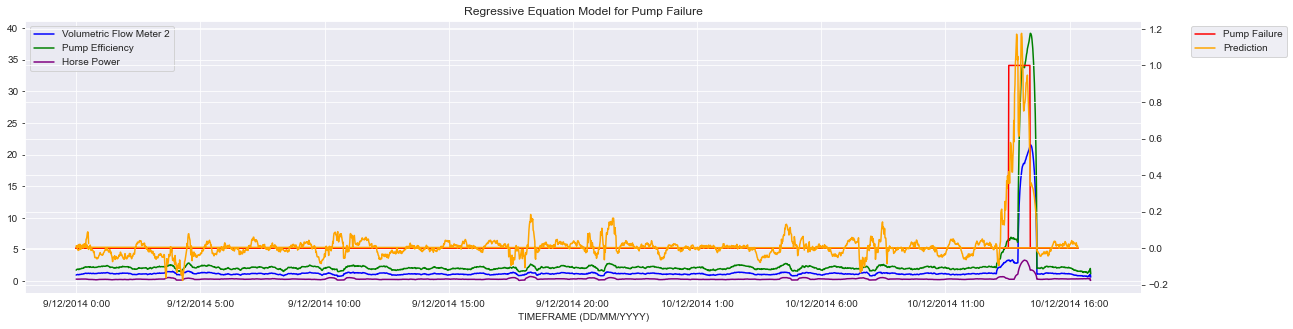

In [18]:
# Creating a new column called Prediction and applying the predict() function on our independent variables (x)

dataframe_stdev['Prediction'] = stdev_model.predict(x)


# Setting the TIMEFRAME (DD/MM/YYYY) column as the index

dataframe_stdev.set_index("TIMEFRAME (DD/MM/YYYY)", inplace=True)


# Creating a dual-axis plot, with our independent variables on axes 1 and Pump Failure and Prediction on axes 2

axis1 = dataframe_stdev[['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power']].plot(color=('blue', 'green', 'purple'))
axis2 = axis1.twinx()
axis2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='red', label='Pump Failure')
axis2.plot(dataframe_stdev['Prediction'], color='orange', label='Prediction')
axis1.xaxis.set_major_locator(plt.MaxNLocator(10))                                                                                            
axis2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('Regressive Equation Model for Pump Failure')
                                                                                           
axis1.legend()
axis2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

The resulting model is an effective tool for predicting pump failure.